### Introduction

#### Wage Data

In [3]:
from ISLP import load_data

# Load the Wage dataset
Wage = load_data('Wage')

# Quick look
print(Wage.head())

   year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154  


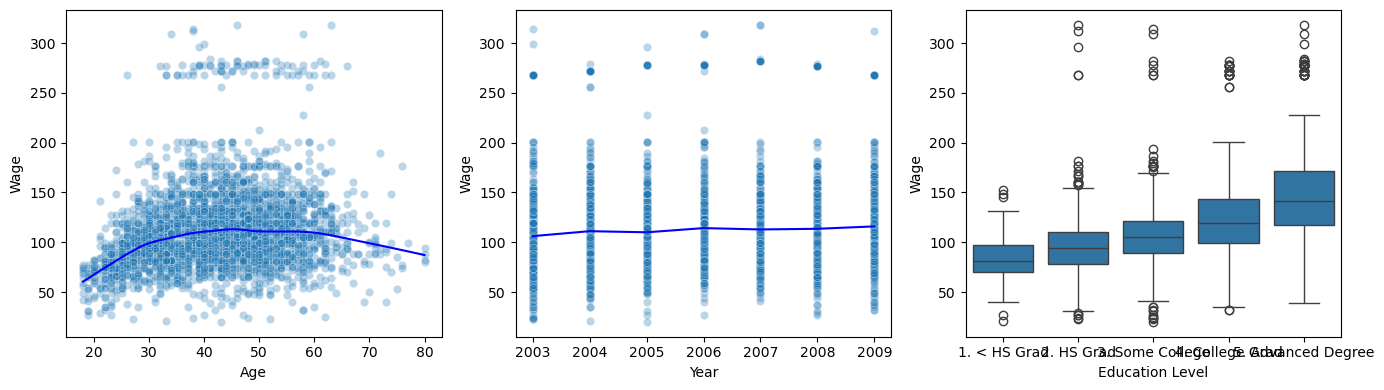

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns  # just for nice scatter/box styling
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# 1. Wage vs Age (with LOESS-like smooth curve)
sns.scatterplot(x='age', y='wage', data=Wage, alpha=0.3, ax=axes[0])
# Fit a LOWESS curve for trend
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_fit = lowess(Wage['wage'], Wage['age'], frac=0.3)
axes[0].plot(lowess_fit[:, 0], lowess_fit[:, 1], color='blue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Wage')

# 2. Wage vs Year (scatter + simple line)
sns.scatterplot(x='year', y='wage', data=Wage, alpha=0.3, ax=axes[1])
mean_by_year = Wage.groupby('year')['wage'].mean()
axes[1].plot(mean_by_year.index, mean_by_year.values, color='blue')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Wage')

# 3. Wage vs Education (boxplot)
sns.boxplot(x='education', y='wage', data=Wage, ax=axes[2])
axes[2].set_xlabel('Education Level')
axes[2].set_ylabel('Wage')

plt.tight_layout()
plt.show()


#### Stock Market Data

In [5]:
# Load the Smarket data
Smarket = load_data('Smarket')

In [6]:
# Quick look at columns
# print(Smarket.columns)
# ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']

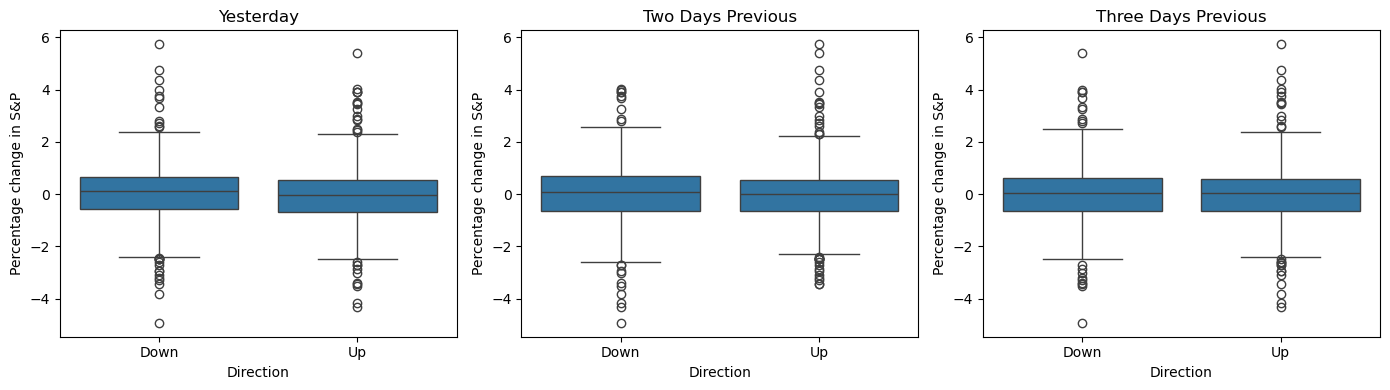

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# 1. Yesterday's (Lag1) percentage change by today's Direction
sns.boxplot(x='Direction', y='Lag1', data=Smarket, ax=axes[0])
axes[0].set_title('Yesterday')
axes[0].set_ylabel('Percentage change in S&P')

# 2. Two days previous (Lag2)
sns.boxplot(x='Direction', y='Lag2', data=Smarket, ax=axes[1])
axes[1].set_title('Two Days Previous')
axes[1].set_ylabel('Percentage change in S&P')

# 3. Three days previous (Lag3)
sns.boxplot(x='Direction', y='Lag3', data=Smarket, ax=axes[2])
axes[2].set_title('Three Days Previous')
axes[2].set_ylabel('Percentage change in S&P')

plt.tight_layout()
plt.show()

#### Gene Expression Data

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 1. Load the Smarket data
Smarket = load_data('Smarket')

In [9]:
# 2. Split into training (2001-2004) and test (2005)
train_mask = Smarket['Year'] < 2005
train = Smarket[train_mask]
test  = Smarket[~train_mask]

X_train = train[['Lag1', 'Lag2']]     # book uses only Lag1 & Lag2
y_train = train['Direction']

X_test  = test[['Lag1', 'Lag2']]
y_test  = test['Direction']

In [10]:
# 3. Fit Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [11]:
# 4. Predict probability of "Down" for 2005 data
# sklearn outputs probabilities for each class in alphabetical order:
# ['Down', 'Up'] → column 0 is Down
prob_down = qda.predict_proba(X_test)[:, 0]

In [13]:
import pandas as pd

In [14]:
# 5. Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Predicted Probability': prob_down,
    'Direction': y_test.values
})

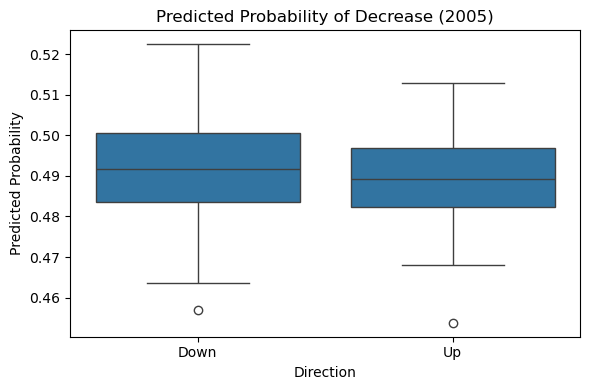

In [15]:
# 6. Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Direction', y='Predicted Probability', data=plot_df)
plt.ylabel('Predicted Probability')
plt.title('Predicted Probability of Decrease (2005)')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.decomposition import PCA

##### NCI60 Data

In [20]:
# Load NCI60 dataset
NCI60 = load_data('NCI60')

# Gene expression matrix (64 samples × 6830 genes)
X = NCI60['data']

# Labels (64 × 1 DataFrame)
y = NCI60['labels']

In [21]:
# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

c:\Users\Zoe Oladokun\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


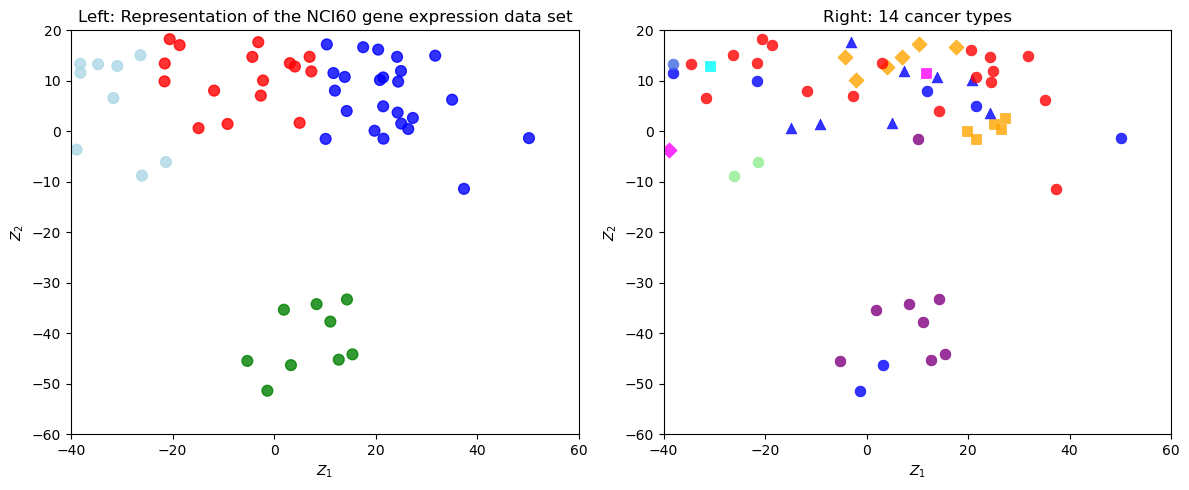

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os

# Suppress the KMeans memory warning on Windows
os.environ['OMP_NUM_THREADS'] = '1'

# Clean the data
if hasattr(y, 'values'):  # If it's a pandas DataFrame/Series
    y_clean = y.values.flatten()
elif hasattr(y, 'flatten'):  # If it's a numpy array
    y_clean = y.flatten()
else:  # If it's already a list
    y_clean = list(y)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create the figure
plt.figure(figsize=(12, 5))

# -------- Left Panel: 4 Clusters --------
plt.subplot(1, 2, 1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Define colors for 4 clusters (matching the original figure)
cluster_colors = ['blue', 'lightblue', 'green', 'red']
colors_left = [cluster_colors[cluster] for cluster in clusters]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors_left, s=60, alpha=0.8)
plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.title("Left: Representation of the NCI60 gene expression data set")
plt.xlim(-40, 60)
plt.ylim(-60, 20)

# -------- Right Panel: Cancer Types with Repeated Shapes but Distinct Colors --------
plt.subplot(1, 2, 2)

# Simple palette of commonly recognized colors
nice_colors = [
    'blue', 'orange', 'red', 'red', 'magenta', 'lightgreen',
    'royalblue', 'cyan', 'purple'
]

# Small set of built-in markers (these will repeat if there are more groups)
basic_markers = ['o', 's', 'o', '^', 'D', 'o']   # circle, square, triangle, diamond, etc.

unique_labels = sorted(list(set(y_clean)))

for i, label in enumerate(unique_labels):
    mask = np.array(y_clean) == label
    color = nice_colors[i % len(nice_colors)]
    marker = basic_markers[i % len(basic_markers)]

    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=color,
        marker=marker,
        s=60,
        alpha=0.8,
        label=label,
        linewidth=0.5
    )

plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.title(f"Right: {len(unique_labels)} cancer types")
plt.xlim(-40, 60)
plt.ylim(-60, 20)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)  # optional
plt.tight_layout()